In [142]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pytz

ticker = "^GSPC"  # S&P 500 Index
df_daily = yf.download(ticker, start="2020-01-01", end="2025-04-17")

df_daily.columns = [col[0] if isinstance(col, tuple) else col for col in df_daily.columns]
df_daily = df_daily[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df_daily.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close      Volume
Date                                                                      
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3459930000
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3484700000
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3702460000
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3435910000
2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049  3726840000


In [32]:
print(df_daily.tail())

                   Open         High          Low        Close      Volume
Date                                                                      
2025-04-10  5353.149902  5353.149902  5115.270020  5268.049805  6677140000
2025-04-11  5255.560059  5381.459961  5220.770020  5363.359863  5602550000
2025-04-14  5441.959961  5459.459961  5358.020020  5405.970215  5031440000
2025-04-15  5411.990234  5450.410156  5386.439941  5396.629883  4317110000
2025-04-16  5335.750000  5367.240234  5220.790039  5275.700195  4607750000


In [70]:
#dataset exploration
print(df_daily.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [41]:
# Get the first and last close prices
first_close = df_daily['Close'].iloc[0]
last_close = df_daily['Close'].iloc[-1]

# Calculate the percentage change
change_percentage = ((last_close - first_close) / first_close) * 100

# Ensure we are working with a single value
change_percentage_value = change_percentage.item()

# Print the result
print(f"Change in S&P 500 since 2020-01-01: {change_percentage_value:.2f}%")


Change in S&P 500 since 2020-01-01: 61.94%


In [85]:
#for multiple timeframe
def chart_data(time_frame):
    print(f"{time_frame} data preview")
    df = yf.download("^GSPC", interval=time_frame, period="60d") 
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df_daily.columns]
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    print(df.head())

In [87]:
#Descriptive summary
print("Descriptive Statistics:")
print(df_daily.describe())

Descriptive Statistics:
              Open         High          Low        Close        Volume
count  1330.000000  1330.000000  1330.000000  1330.000000  1.330000e+03
mean   4342.437904  4368.575075  4314.350411  4343.053279  4.419564e+09
std     826.635154   826.199810   826.567344   826.445600  1.067433e+09
min    2290.709961  2300.729980  2191.860107  2237.399902  1.639500e+09
25%    3840.292542  3871.287415  3809.417603  3841.587463  3.767215e+09
50%    4268.474854  4292.104980  4229.080078  4272.654785  4.160800e+09
75%    4741.230103  4765.237671  4720.707397  4745.770020  4.762638e+09
max    6134.500000  6147.430176  6111.149902  6144.149902  9.976520e+09


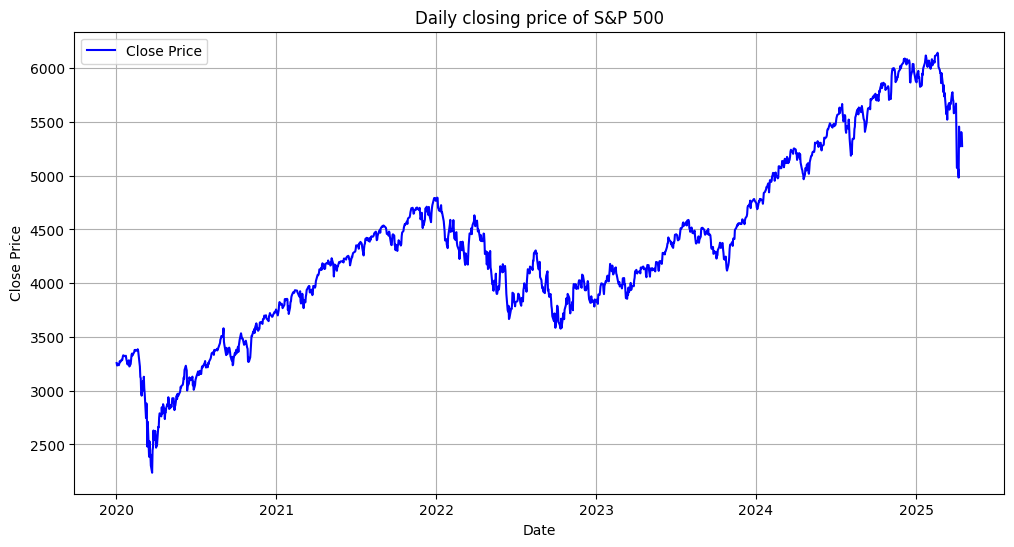

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Close'], label='Close Price', color='blue')
#plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')
plt.title('Daily closing price of S&P 500')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
Q1 = df_daily['Close'].quantile(0.25)
Q3 = df_daily['Close'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bands
lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR

# Print the bands
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"Lower Band (Outlier threshold): {lower_band}")
print(f"Upper Band (Outlier threshold): {upper_band}")

Q1: 3841.5874633789062
Q3: 4745.77001953125
Lower Band (Outlier threshold): 2485.3136291503906
Upper Band (Outlier threshold): 6102.043853759766


In [ ]:
#based on these we can say market is volatile

In [194]:
def chart_data(time_frame, need_range):
    ticker = "^GSPC"
    ticker = str(ticker)
    print(f"{time_frame} data preview")
    df = yf.download(ticker, interval=time_frame, period = need_range) 
    if time_frame == '60m':
        #df = df.resample('4h').last()
        df = df.resample('4h', offset='2h', closed='right', label='right').last()

    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    ny_tz = pytz.timezone('America/New_York')
    df.index = df.index.tz_convert(ny_tz)
    print(df.head())
    return df

In [226]:
weekly_chart = chart_data('15m','60d')

15m data preview


[*********************100%***********************]  1 of 1 completed

                                  Open         High          Low        Close  \
Datetime                                                                        
2025-01-22 09:30:00-05:00  6081.390137  6085.029785  6076.129883  6079.350098   
2025-01-22 09:45:00-05:00  6079.430176  6088.129883  6078.049805  6086.569824   
2025-01-22 10:00:00-05:00  6087.310059  6091.330078  6082.000000  6089.669922   
2025-01-22 10:15:00-05:00  6089.720215  6092.660156  6087.470215  6089.229980   
2025-01-22 10:30:00-05:00  6089.240234  6092.810059  6087.810059  6092.609863   

                              Volume  
Datetime                              
2025-01-22 09:30:00-05:00  103699327  
2025-01-22 09:45:00-05:00  134572963  
2025-01-22 10:00:00-05:00  121568647  
2025-01-22 10:15:00-05:00   93085577  
2025-01-22 10:30:00-05:00   89239150  


In [218]:
data_1wk = yf.download(ticker, interval='1wk', period='3mo')
print(data_1wk.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                                       
2025-01-13  5996.660156  6014.959961  5930.720215  5963.609863   8652640000
2025-01-20  6101.240234  6128.180176  6006.879883  6014.120117  17672460000
2025-01-27  6040.529785  6120.910156  5962.919922  5969.040039  23266090000
2025-02-03  6025.990234  6101.279785  5923.930176  5969.649902  23577640000
2025-02-10  6114.629883  6127.470215  6003.000000  6046.399902  22510590000


In [267]:
def custom_timeframe(ticker,interval, period):
    data = yf.download(tickers=ticker, interval=interval, period=period)
    #data.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    print(data.head())
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f"{ticker} Close Price ({interval} | {period})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return data


[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-01-17  5996.660156  6014.959961  5978.439941  5995.399902  4366830000
2025-01-21  6049.240234  6051.509766  6006.879883  6014.120117  4702920000
2025-01-22  6086.370117  6100.810059  6076.129883  6081.390137  4323040000
2025-01-23  6118.709961  6118.729980  6074.669922  6076.319824  4432250000
2025-01-24  6101.240234  6128.180176  6088.740234  6121.430176  4214250000


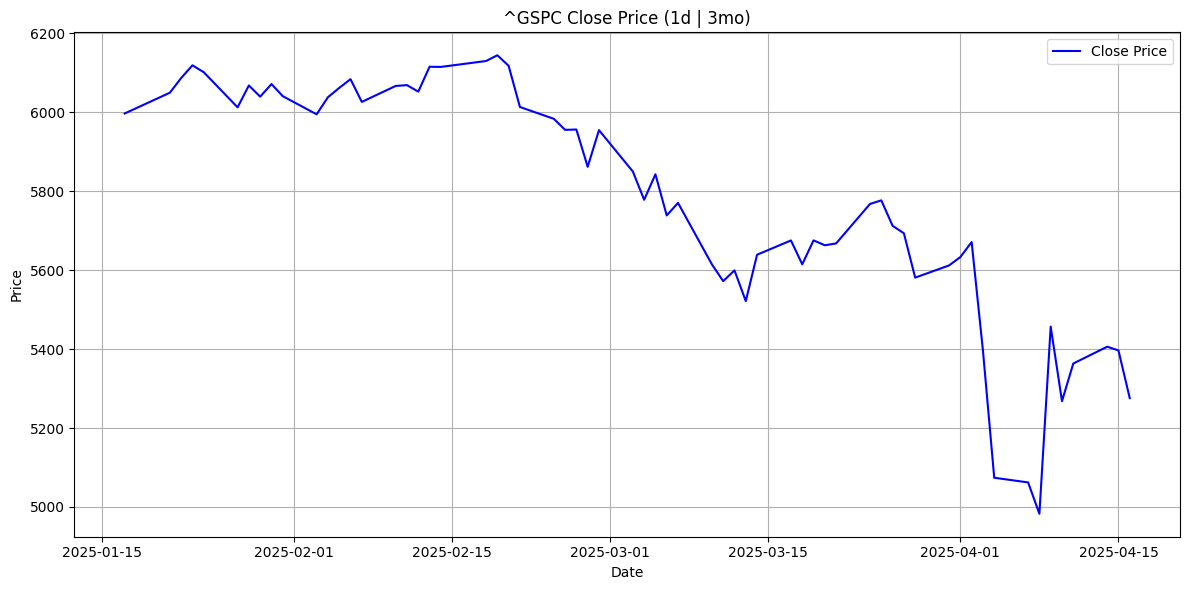

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-01-17,5996.660156,6014.959961,5978.439941,5995.399902,4366830000
2025-01-21,6049.240234,6051.509766,6006.879883,6014.120117,4702920000
2025-01-22,6086.370117,6100.810059,6076.129883,6081.390137,4323040000
2025-01-23,6118.709961,6118.729980,6074.669922,6076.319824,4432250000
2025-01-24,6101.240234,6128.180176,6088.740234,6121.430176,4214250000
...,...,...,...,...,...
2025-04-10,5268.049805,5353.149902,5115.270020,5353.149902,6677140000
2025-04-11,5363.359863,5381.459961,5220.770020,5255.560059,5602550000


In [269]:
custom_timeframe("^GSPC", interval="1d", period="3mo")

[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open       Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                                       
2025-01-13  5996.660156  6014.959961  5930.720215  5963.609863   8652640000
2025-01-20  6101.240234  6128.180176  6006.879883  6014.120117  17672460000
2025-01-27  6040.529785  6120.910156  5962.919922  5969.040039  23266090000
2025-02-03  6025.990234  6101.279785  5923.930176  5969.649902  23577640000
2025-02-10  6114.629883  6127.470215  6003.000000  6046.399902  22510590000


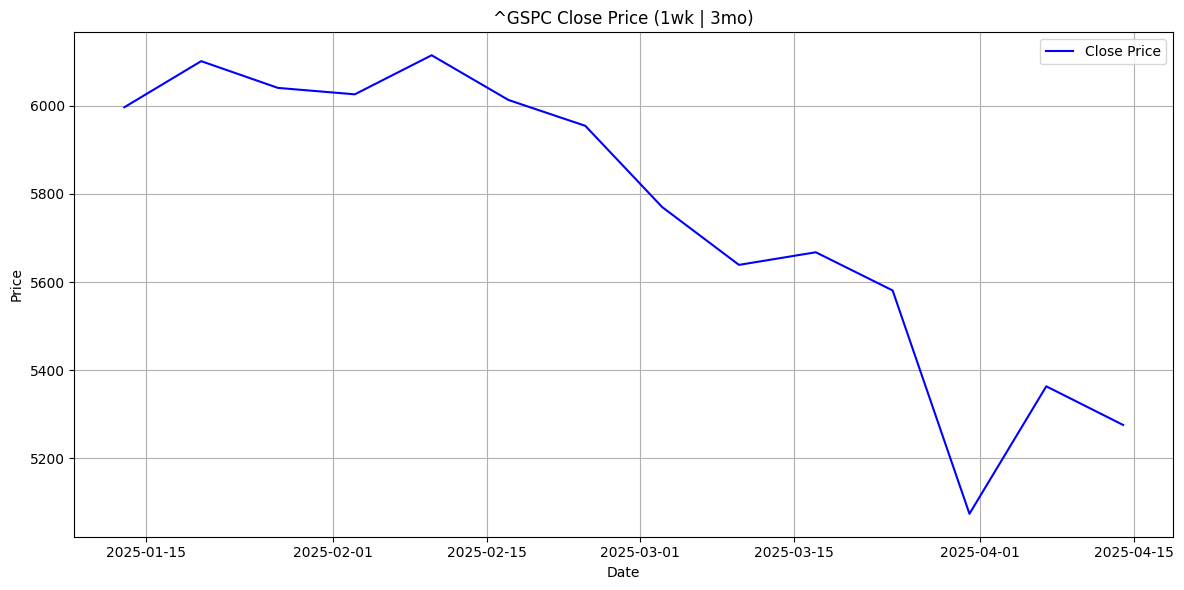

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-01-13,5996.660156,6014.959961,5930.720215,5963.609863,8652640000
2025-01-20,6101.240234,6128.180176,6006.879883,6014.120117,17672460000
2025-01-27,6040.529785,6120.910156,5962.919922,5969.040039,23266090000
2025-02-03,6025.990234,6101.279785,5923.930176,5969.649902,23577640000
2025-02-10,6114.629883,6127.470215,6003.000000,6046.399902,22510590000
2025-02-17,6013.129883,6147.430176,6008.560059,6121.600098,19495560000
2025-02-24,5954.500000,6043.649902,5837.660156,6026.689941,26733210000
2025-03-03,5770.200195,5986.089844,5666.290039,5968.330078,27908150000


In [271]:
custom_timeframe("^GSPC", interval="1wk", period="3mo")

[*********************100%***********************]  1 of 1 completed


Price                            Close         High          Low         Open  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Datetime                                                                        
2025-04-16 13:30:00+00:00  5335.479980  5355.189941  5314.500000  5335.750000   
2025-04-16 14:30:00+00:00  5363.750000  5367.240234  5331.649902  5335.439941   
2025-04-16 15:30:00+00:00  5332.259766  5364.299805  5326.040039  5363.750000   
2025-04-16 16:30:00+00:00  5332.910156  5337.910156  5320.140137  5332.250000   
2025-04-16 17:30:00+00:00  5277.890137  5333.379883  5257.919922  5332.959961   

Price                         Volume  
Ticker                         ^GSPC  
Datetime                              
2025-04-16 13:30:00+00:00          0  
2025-04-16 14:30:00+00:00  362823484  
2025-04-16 15:30:00+00:00  269321467  
2025-04-16 16:30:00+00:00  239042000  
2025-04-16 17:30:00+00:00  414378000  


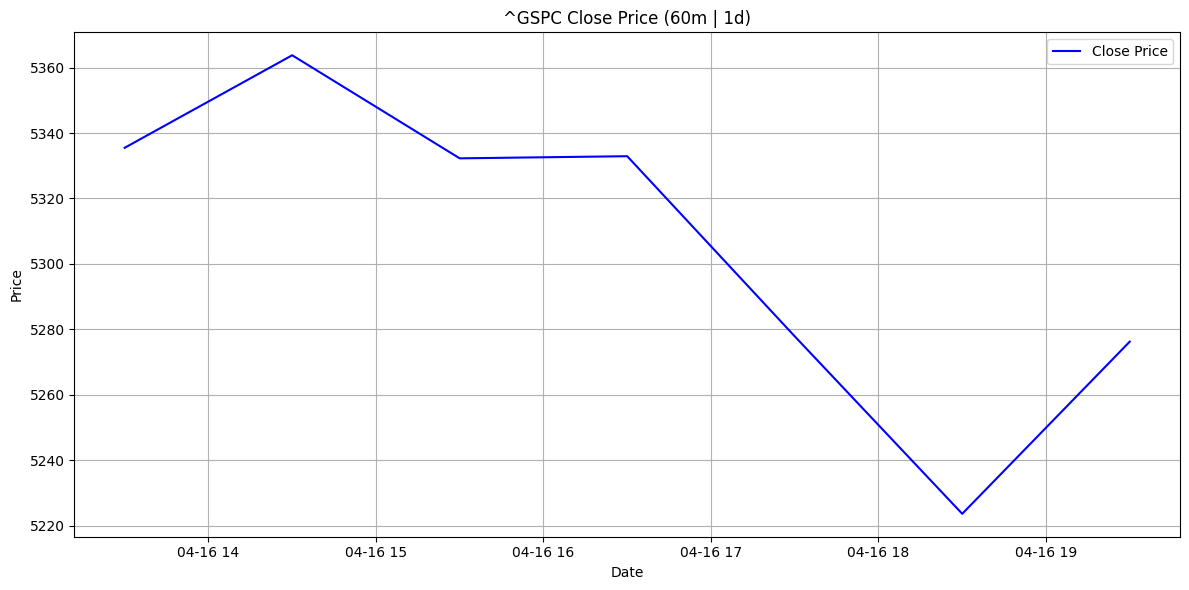

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Datetime,,,,,
2025-04-16 13:30:00+00:00,5335.479980,5355.189941,5314.500000,5335.750000,0
2025-04-16 14:30:00+00:00,5363.750000,5367.240234,5331.649902,5335.439941,362823484
2025-04-16 15:30:00+00:00,5332.259766,5364.299805,5326.040039,5363.750000,269321467
2025-04-16 16:30:00+00:00,5332.910156,5337.910156,5320.140137,5332.250000,239042000
2025-04-16 17:30:00+00:00,5277.890137,5333.379883,5257.919922,5332.959961,414378000
2025-04-16 18:30:00+00:00,5223.669922,5278.640137,5220.790039,5277.879883,403487000
2025-04-16 19:30:00+00:00,5276.259766,5279.040039,5223.640137,5223.640137,540994000


In [272]:
custom_timeframe("^GSPC", interval="60m", period="1d")

In [1]:
def chart_data_1(time_frame):
    print(f"{time_frame} data preview")
    df = yf.download("^GSPC", interval=time_frame, period="60d") 
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df_daily.columns]
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    print(df.head())
    

[*********************100%***********************]  1 of 1 completed


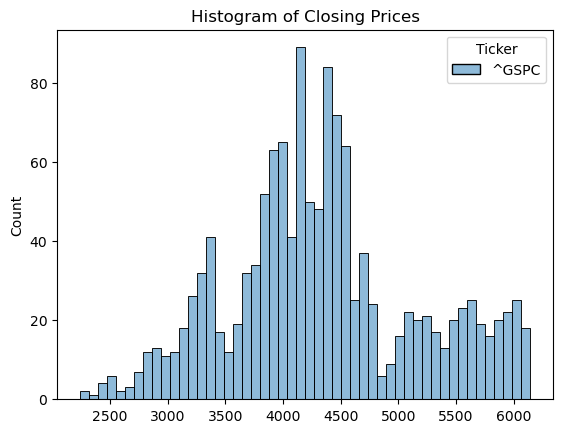

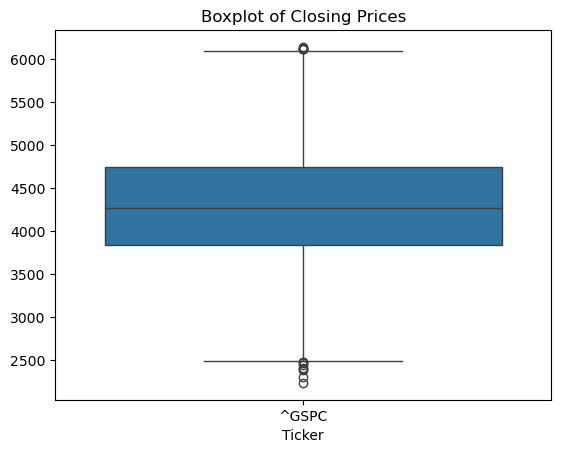

In [9]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pytz


ticker = "^GSPC"  # S&P 500 Index
df_daily = yf.download(ticker, start="2020-01-01", end="2025-04-17")


sns.histplot(df_daily['Close'], bins=50)
plt.title("Histogram of Closing Prices")
plt.show()

sns.boxplot(df_daily['Close'])
plt.title("Boxplot of Closing Prices")
plt.show()


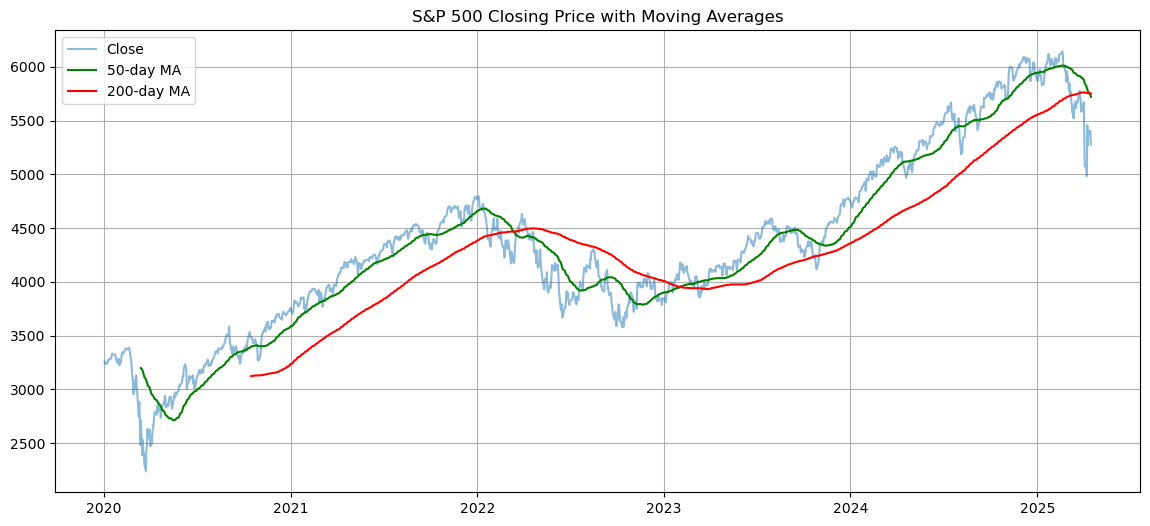

In [22]:
# Rolling average
df_daily['Rolling 50D'] = df_daily['Close'].rolling(50).mean()
df_daily['Rolling 200D'] = df_daily['Close'].rolling(200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_daily['Close'], label='Close', alpha=0.5)
plt.plot(df_daily['Rolling 50D'], label='50-day MA', color='green')
plt.plot(df_daily['Rolling 200D'], label='200-day MA', color='red')
plt.title("S&P 500 Closing Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


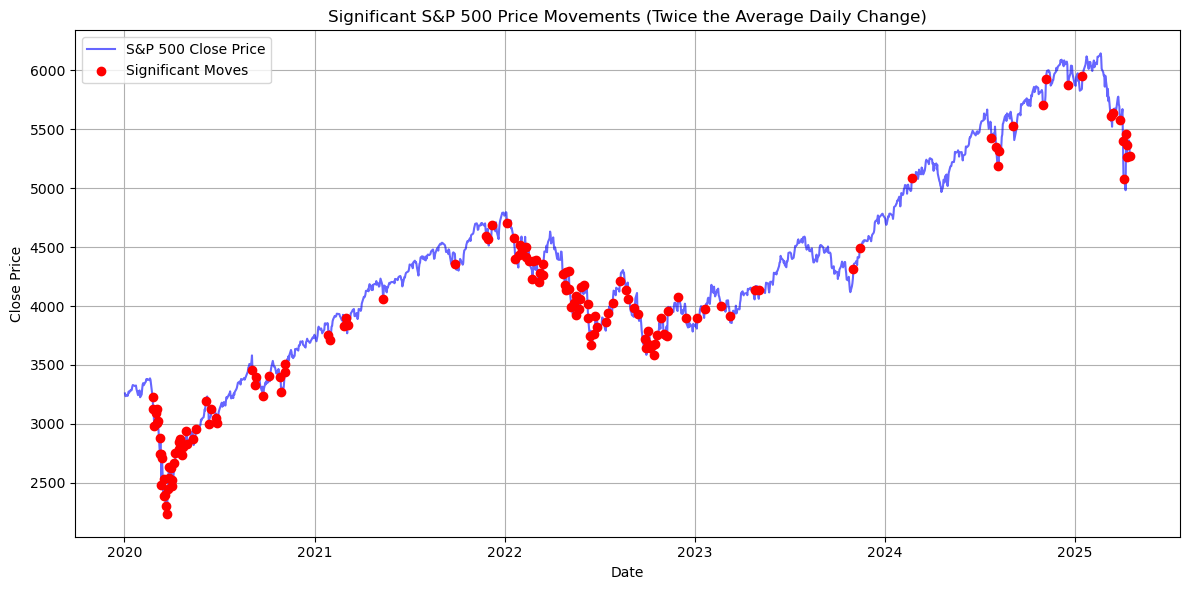

In [38]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download S&P 500 data
ticker = "^GSPC"  # S&P 500 Index
df_daily = yf.download(ticker, start="2020-01-01", end="2025-04-17")

# Calculate daily percentage change
df_daily['Daily Change (%)'] = df_daily['Close'].pct_change() * 100

# Calculate the average absolute daily percentage change
avg_change = df_daily['Daily Change (%)'].abs().mean()

# Define the threshold for "twice the average swing"
threshold = 2 * avg_change

# Filter for days with daily change > twice the average
significant_moves = df_daily[abs(df_daily['Daily Change (%)']) > threshold]

# Plot the data for these significant days
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Close'], label='S&P 500 Close Price', color='blue', alpha=0.6)
plt.scatter(significant_moves.index, significant_moves['Close'], color='red', label='Significant Moves', zorder=5)
plt.title('Significant S&P 500 Price Movements (Twice the Average Daily Change)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


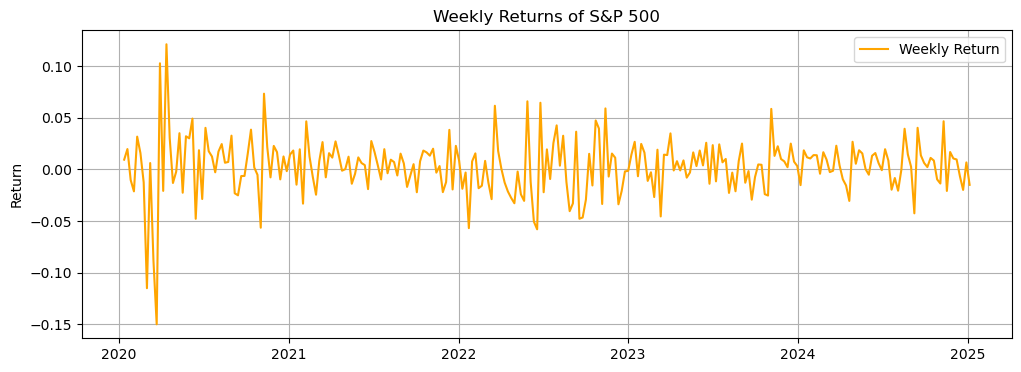

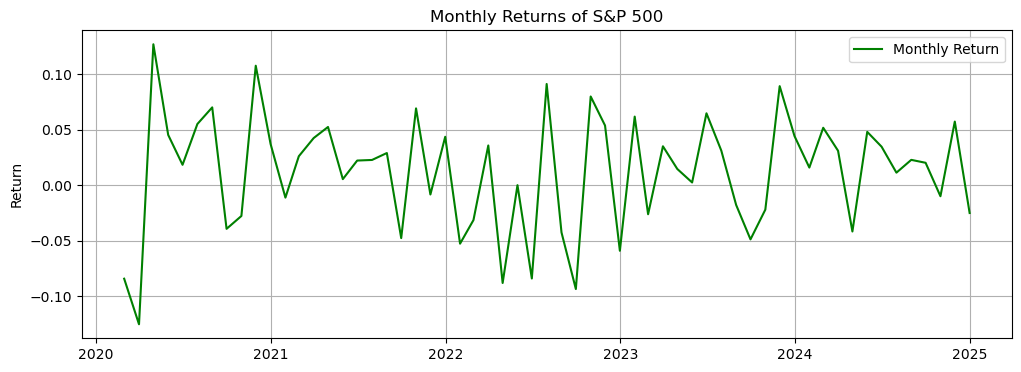

In [55]:

# Calculate Returns
df_weekly = df_daily['Close'].resample('W').last().pct_change()
df_monthly = df_daily['Close'].resample('ME').last().pct_change()

plt.figure(figsize=(12, 4))
plt.plot(df_weekly, label='Weekly Return', color='orange')
plt.title("Weekly Returns of S&P 500")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df_monthly, label='Monthly Return', color='green')
plt.title("Monthly Returns of S&P 500")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.show()


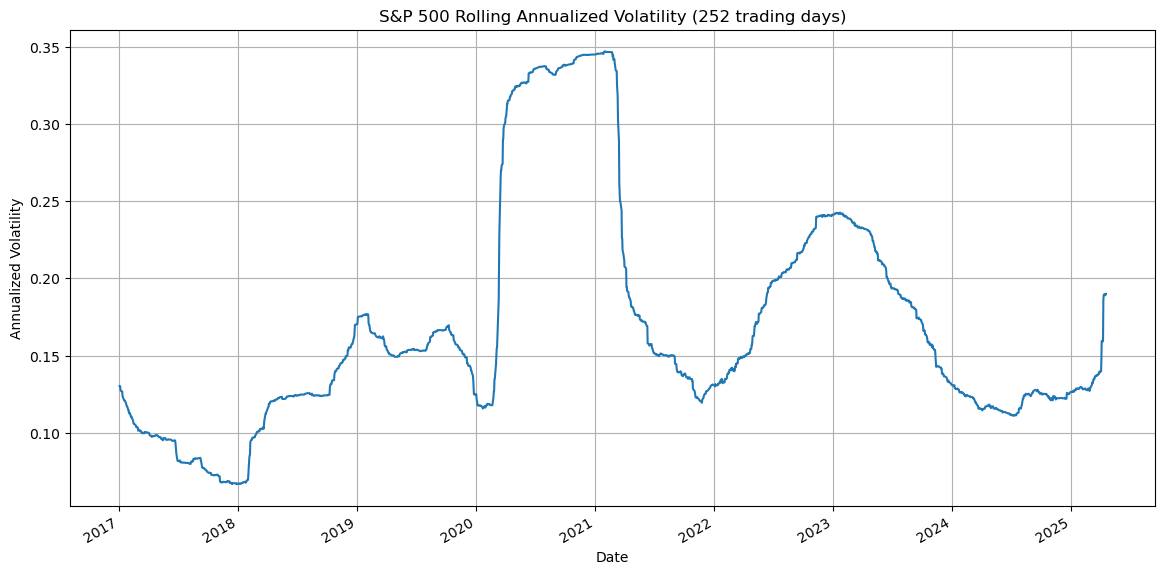

In [64]:
# Calculate rolling metrics
window = 252  # One year of trading days

# Rolling mean and standard deviation
df_daily['Rolling Mean (252d)'] = df_daily['Close'].rolling(window=window).mean()
df_daily['Rolling Std (252d)'] = df_daily['Close'].rolling(window=window).std()

# Rolling annualized volatility
df_daily['Rolling Ann. Vol (252d)'] = df_daily['Daily Return'].rolling(window=window).std() * np.sqrt(252)

# Plot rolling volatility
plt.figure(figsize=(14, 7))
df_daily['Rolling Ann. Vol (252d)'].plot()
plt.title('S&P 500 Rolling Annualized Volatility')
plt.ylabel('Annualized Volatility')
plt.grid(True)

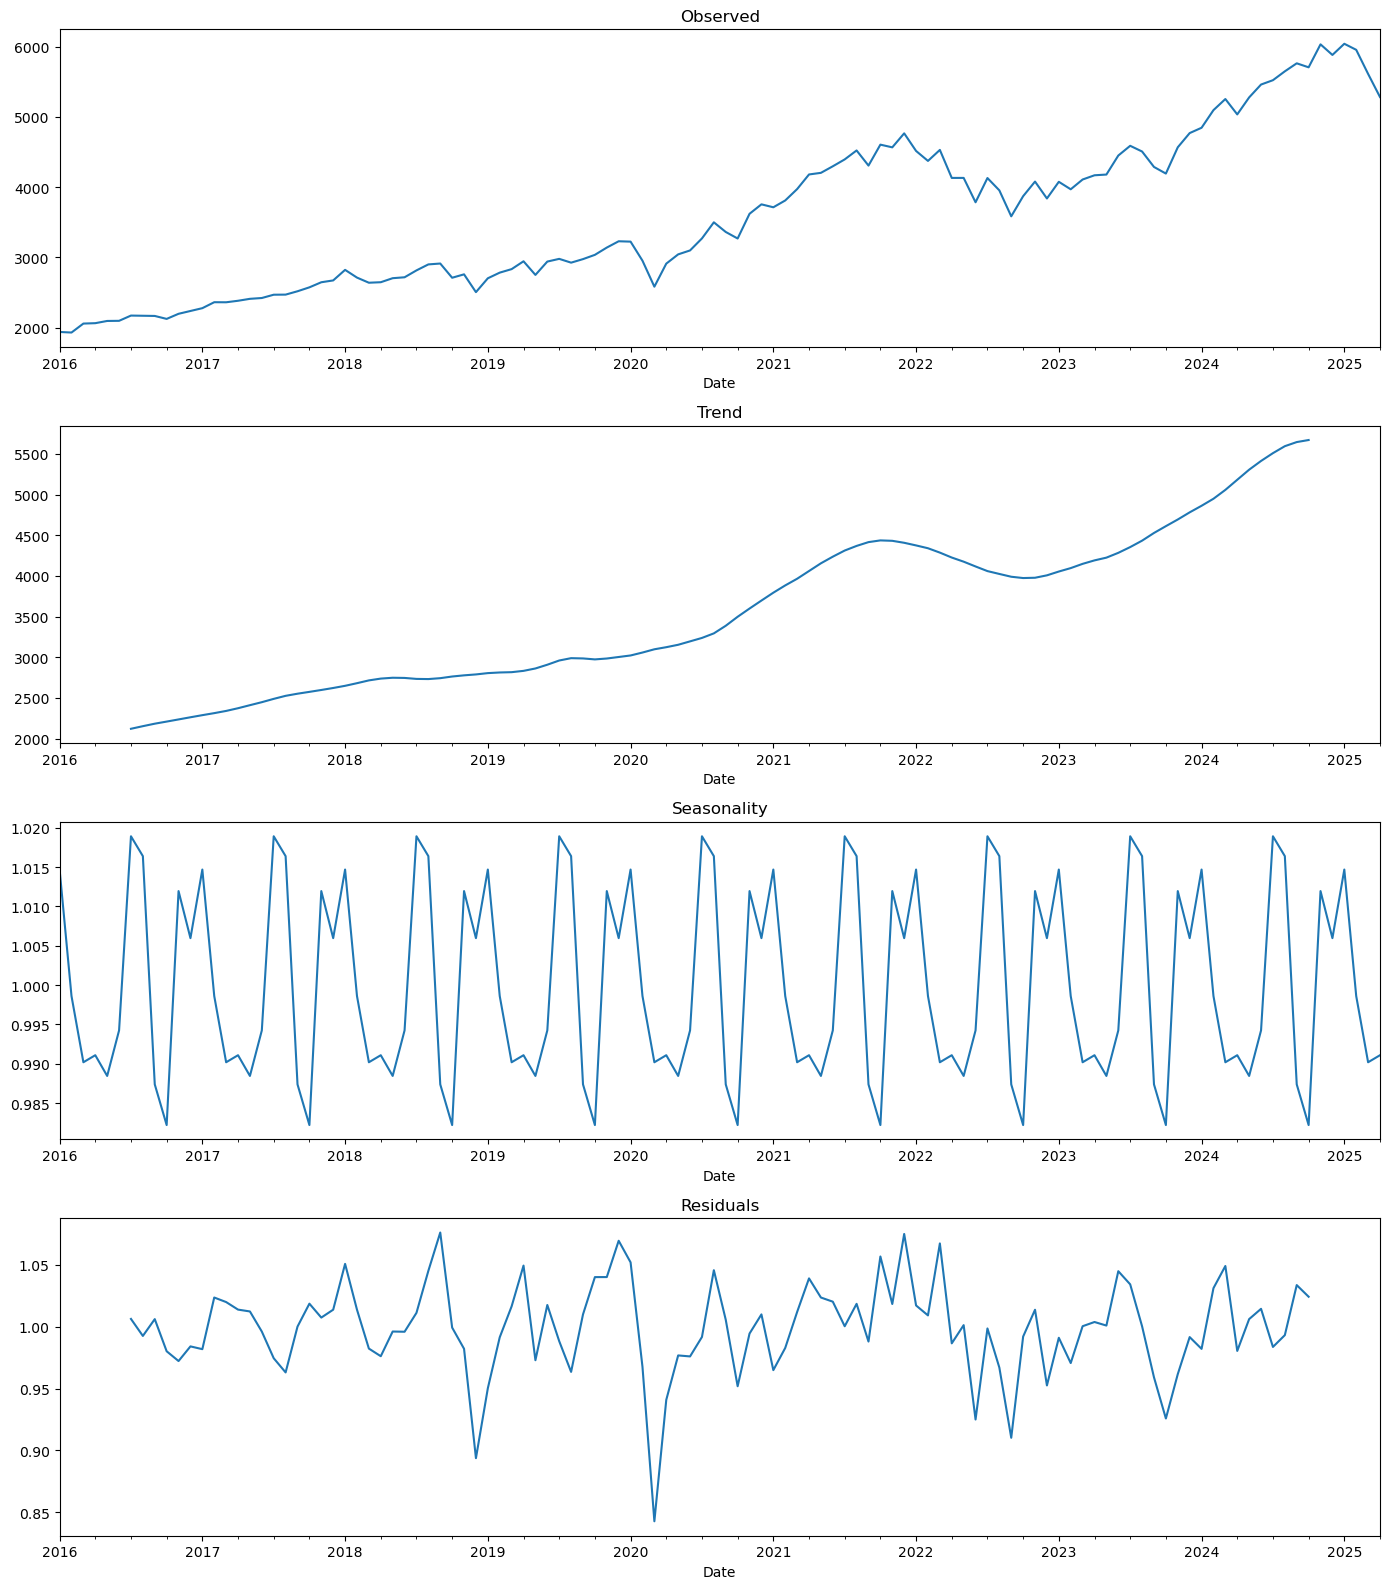

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to monthly for clearer seasonal patterns
monthly_close = df_daily['Close'].resample('ME').last()
decomposition = seasonal_decompose(monthly_close, model='multiplicative', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals')
plt.tight_layout()